# Experiment 24

Analysis of Phantom data from March 27, 2024

Measured B fields:

- Center (water): 123.23057 Mhz
- Fat: -0.000410 Mhz

In [1]:
dt = 1 / 410 * 1000 # 2.4390243902439024 ms

# From March 13, 2024 dataset
t0 = 3.41
t1 = 4.55
t2 = 5.68
print(t0, t1, t2, t2 - t0)

# Calculated t1, t2 from B fields of March 27, 2004
t0 = 3.14
t1 = t0 + (2.439 / 2)
t2 = t0 + (2.439)
print(t0, t1, t2, dt)

3.41 4.55 5.68 2.2699999999999996
3.14 4.359500000000001 5.579000000000001 2.4390243902439024


In [2]:
import sys
sys.path.insert(0, '../../')
import math
import numpy as np
import matplotlib.pyplot as plt
from gasp import ssfp, responses, simulation, dataset, get_project_path, gasp as GASP, analysis

In [3]:
path = get_project_path()
M = dataset.load_dataset12a( path)
M.shape

Data: 20240327_GASP_PHANTOM data exists
Path: c:\Users\mmend\projects\mri\GASP\notebooks\experiments\../..\gasp\../data\20240327_GASP_PHANTOM\dixon\
Loading files: ['meas_MID140_gre_TE3p41_FID60988.dat', 'meas_MID141_gre_TE4p55_FID60989.dat', 'meas_MID142_gre_TE5p68_FID60990.dat']
pymapVBVD version 0.5.7
Software version: VB
                                                                    

pymapVBVD version 0.5.7
Software version: VB


pymapVBVD version 0.5.7
Software version: VB


(128, 128, 8, 3)

(128, 128, 8, 3)


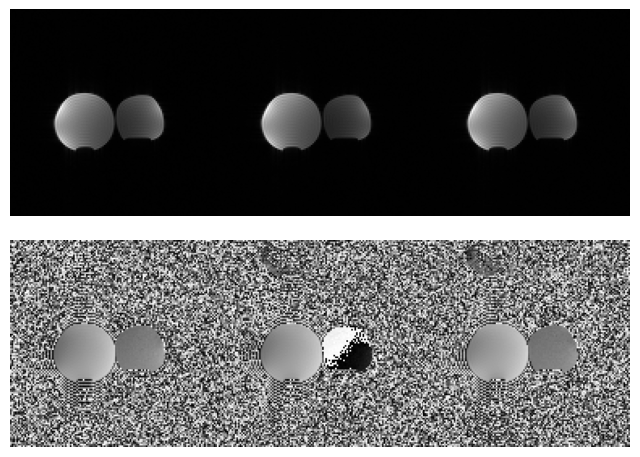

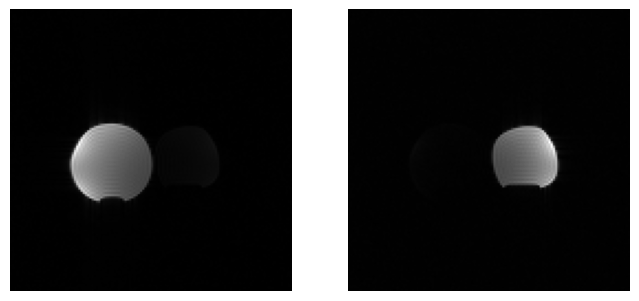

In [4]:
Mw, Mf = analysis.dixon_3pt(M)
analysis.plot_dixon_inputdata(M)
analysis.plot_dixon(Mw, Mf)

(1, 256)
(1, 256)


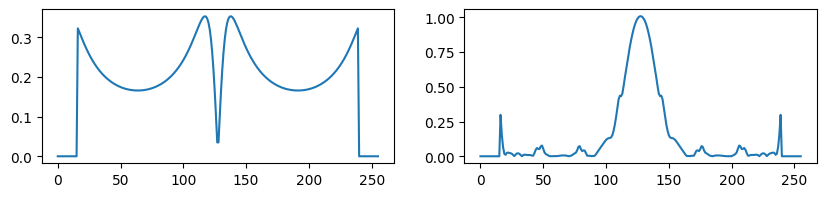

In [5]:
analysis.gasp_plot_train(alpha = 20, bw = 0.2, shift = 0, method='linear')

(1, 256)
(1, 256)


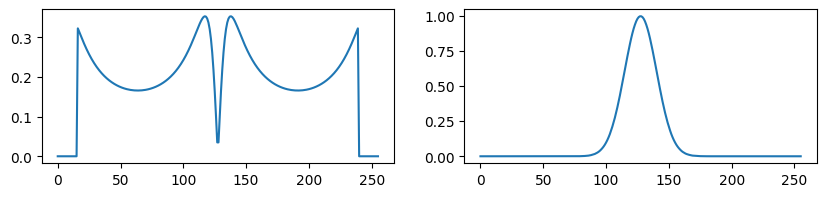

In [6]:
analysis.gasp_plot_train(alpha = 20, bw = 0.2, shift = 0, method='lev-mar-quad')

In [7]:
M_phantom20 = dataset.load_dataset12b(path)
M_phantom90 = dataset.load_dataset12c(path)

from IPython.display import clear_output
clear_output(wait=True)
print('', flush=True)

print(f'M20: {M_phantom20.shape}')
print(f'M90: {M_phantom90.shape}')


M20: (256, 256, 8, 16, 3)
M90: (256, 256, 8, 16, 3)


10


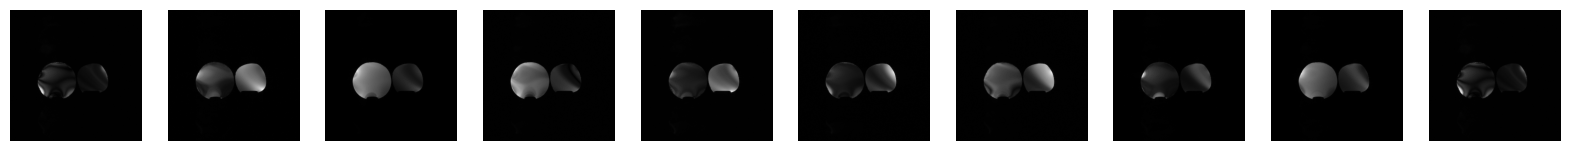

10


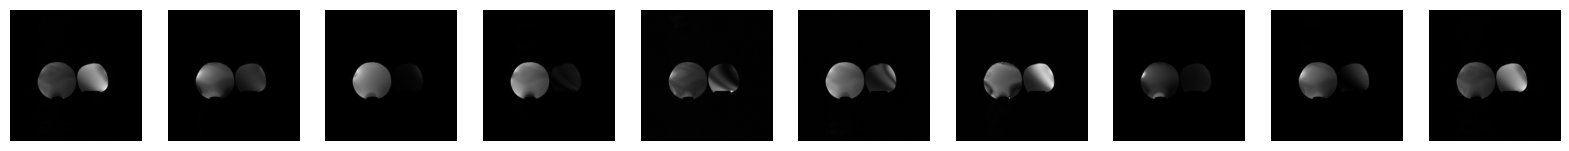

In [12]:
analysis.gasp_sweep(M_phantom90, sweep_type = 'shift', sweep_start=-0.5, sweep_end=0.5, method='linear', bw=0.13)
analysis.gasp_sweep(M_phantom90, sweep_type = 'shift', sweep_start=-0.5, sweep_end=0.5, method='lev-mar-quad', bw=0.13)
